**Fall 2019**

**P556: Applied Machine Learning**

**Assignment #1**

**Due date: September 18, 2019. 11:59 PM**

DO NOT CHANGE THE FUNCTION DEFINITIONS UNLESS APPROVED BY AN AI.

# Problem #1: Linear Regression

##  Problem 1.1 (25 points)

Implement linear regression using gradient descent. Your implementation should be able to handle simple and multiple linear regression.

Note 1: by implementation we mean that everything has to be written from scratch and that you cannot call a linear regression function from a library, such as sklearn. Usage of standard libraries, such as numpy, pandas, etc., is fine. If you are unsure about whether a library can be used, please contact the AIs well in advance of the submission date.

Note 2: You are free to use sklearn to test whether your results match that from a battle-tested library. This is a great way to know before hand whether your submission is correct. Make sure to use the same parameters on both models before you spend an eternity debugging code that is correct but not returning the same values.

In [1]:
import pandas as pd

In [2]:
import numpy as np

class linear_regression:
    def __init__(self, learning_rate, iterations, 
               fit_intercept=True, normalize=False, coef=None):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.coef = coef
        self.min = 9999
        
    def mse(self, y_actual, y_pred):
        return ((y_actual-y_pred)**2).sum()/len(y_pred)
  
    def fit(self, X, y):
        """
        Fit linear model.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data
        y : array_like, shape (n_samples, n_targets)
            Target values.
        """
        for i in range(self.iterations):
            #predict y from y = mx + c
            y_pred=self.predict(X)
#             print(y_pred.shape)
            #calculate loss
#             loss = self.mse(y,y_pred)
            loss = y_pred - y
#             print("Loss ",loss)
            #find gradient to minimize loss
            gradient = X.T.dot(loss) / len(y)
            cost = self.mse(y,y_pred)
            if (cost<self.min):
                self.min=cost
#             print(cost)
            #update coef
            self.coef = self.coef - self.learning_rate * gradient
#         print("The coefficients are:")
#         print(self.coef)

    def predict(self, X):
        """Predict using the linear model
        Parameters
        ----------
        X : array_like, shape (n_samples, n_features)
            Samples.
        Returns
        -------
        C : array, shape (n_samples,)
            Returns predicted values.
        """
#         print(X.shape)
#         print(self.coef.shape)
#         print(X.dot(self.coef).shape)
        return X.dot(self.coef)

## Problem 1.2 (10 points)

- Split the Boston Housing dataset into train and test sets (70% and 30%, respectively) (5 points). 
- Fit your linear regression implementation using the training set and print your model's coefficients. Make predictions for the test set using your fitted model (5 points).

In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# Your code goes here
boston = load_boston()
df = pd.DataFrame(boston.data)
X = df.iloc[:,0:12]
y = df.iloc[:,-1]

# find the mean of X
x_mean= X.mean()
y_mean= y.mean()
# find the sd of X & y
std_x = X.std()
std_y = y.std()
# normalization = (X - mean) / sd
X = (X-x_mean)/std_x
y = (y-y_mean)/std_y

In [4]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 12), (152, 12), (354,), (152,))

In [6]:
# np.random.randint?

In [7]:
linear = linear_regression(0.01, 50, False, False, np.random.randint(10, size=12))

In [8]:
linear.fit(X_train,y_train)

In [9]:
print("The coefficients are: \n", linear.coef)

The coefficients are: 
 0    -0.273363
1     4.247201
2     1.481289
3     3.906879
4     0.294851
5     5.095538
6     6.112667
7     6.278130
8     2.792764
9     5.770312
10    1.570004
11    6.241038
dtype: float64


In [24]:
print("Minimum squared error is")
linear.min

Minimum squared error is


69.41471683287571

In [11]:
predictions = linear.predict(X_test)

## Problem 1.3 (10 points)

Identify the variable or set of variables that will minimize the mean square error (MSE). Hint: this is where your function being able to handle simple and multiple regression becomes useful.

In [12]:
from sklearn.metrics import mean_squared_error
from itertools import combinations

In [21]:
length_df=df.shape[1] - 1
# print(length_df)
columns_list = list(df.columns)[:length_df]
# print(columns_list)
min_min=9999
combo = []

for i in range(1,length_df+1):
    cc = list(combinations(columns_list,i))
    for c in cc:
        c = list(c)
#         print(c)
        linear = linear_regression(0.01, 50, False, False, np.random.randint(10, size=len(c)))
        linear.fit(X_train.iloc[:,c],y_train)
        if(linear.min<min_min):
            min_min=linear.min
            combo = c

print("The minimum squared error and the corresponding set of column numbers are")
print(min_min)            
print(combo)

The minimum squared error and the corresponding set of column numbers are
0.705582733941313
[5]


## Problem 1.4 (5 points)

1. How do you interpret that a variable causes a model's mean square error to increase? (2 points)
  - Answer: While calculating MSE, the two parameters that we need are the actual values and the predicted values and we find out the error in our predictions with respect to the actual values. A large MSE value signifies that the predicted data varies highly from the actual data. The variables or the parameters in our dataset might not be always tightly bound to the parameter we are trying to predict. Including some variables might even take us further away from the intended prediction. Hence, choosing a set of variables that give the least answer for Mean Square error gives better or more accurate predictions. Lesser the value of MSE, more tightly bound and dependent the predictions are on the chosen set of variables.If all the variables, including the ones which highly vary from the mean value are chosen, it will result in less accurate prediction.
2. Why we would want to normalize our variables? (1 point)
  - Answer: In a dataset, there are various kinds of variables with different scales of measures. Like for a housing dataset, area of the bedroom is a huge scale (100 Sq ft) whereas number of bedrooms is a single unit measure. Here, area of the bedroom will dominate the prediction if it is not normalized. By normalization, we scale the variables to solve this problem and make the learning process efficient. Once the variables are on the same scale, it is easier to handle such data and process it for predictions
3. A model fitted using the exact same split dataset with normalized values will generate the same coefficients as a model that was fitted using values that haven't been normalized. Clearly state whether that statement is true or false and explain your reasoning. (2 points)
  - Answer: In my opinion, the normalized data will not generate the exact coefficients as the original not normalized data. When we normalize data, there will be a corresponding change in the coefficients as well, as the coefficients for these scaled entries will be calculated

# Problem 2: Binary Classification

## Problem 2.1 (5 points)

Consider the binary classification problem of mapping a given input to two classes. Let $\mathcal{X}=\mathbb{R}^d$ and $\mathcal{Y}=\{+1, -1\}$ be the input space and output space, respectively. In simple words, it means that the input has $d$ features and all of them are real valued, whereas the output can only take values $-1$ or $+1$. This is one of the most common problems in machine learning and many sophisticated methods exist to solve it. In the question, we will solve it using the concepts we have already learned in class. Let us assume the two sets of points can be separated using a straight line i.e. the samples are linearly separable. So if $d=2$, one should be able to draw a line to distinguish between the two classes. All points lying on side of the line should belong to a particular class (say $1$) and the points lying on the other side should belong to another class (say $2$). To see what this would look like,  your first task is as follows:

Write a function that will randomly generate a dataset for this problem. Your function should randomly choose a line $l$, which can be denoted as $ax + by + c = 0$. According to basic high school geometry, the line divides the plane into two sides. On one side, $ax+by+c>0$ while on the other $ax+by+c<0$. Use this fact to randomly generate $k_0$ points on the side of class 0 (i.e. $y=-1$) and $k_1$ points on the side of class 1 (i.e. $y=1$). Create a plot of this dataset where all the points corresponding to one class are blue and those of the other class are green, the line dividing both classes should be red. Axes should be labeled.

**Note**: Do not confuse the $x$ and $y$ in the equation of line $ax + by + c = 0$ with $\mathcal{X} $ and $\mathcal{Y}$. Instead imagine these $x$ and $y$ as the 2-D coordinate system on which you have different points which should lie on 2 sides of the line $ax + by + c = 0$. For example, there is a point (2,3) in the 2-D system where $x = 2$ and $y = 3$.

In [14]:
from matplotlib import pyplot as plt
def generate_dataset(k0, k1):
    #generate coefficients randomly
    a = np.random.randint(-1000,1000)
    b = np.random.randint(-1000,1000)
    c = np.random.randint(1,500)
    
    X = []
    y = []
    
    #find x,y coordinates to plot the ax+by+c line
    rx = np.random.randint(-500,500,size=30)
    ry = -(a/b)*rx - (c/b)
    plt.plot(rx,ry,'r-')
    plt.xlabel('X')
    plt.ylabel('Y')
        
    #generating dataset
    
    while k0!=0:
        temp_x = np.random.randint(-500,500)
        temp_y = np.random.randint(-500,500) 
        res = a*temp_x + b*temp_y + c
        if (res<0):
            k0-=1
            X.append((temp_x, temp_y))
            y.append(-1)
#     print(X[:5])
            
    while k1!=0:
        temp_x = np.random.randint(-500,500)
        temp_y = np.random.randint(-500,500) 
        res = a*temp_x + b*temp_y + c
        if (res>0):
            k1-=1
            X.append((temp_x, temp_y))
            y.append(1)
#     checking for the class label of each point in order to assign colors to each and plot

    for i in range(len(X)):
        res = a*X[i][0] + b*X[i][1] + c
        if (res<0):
            plt.plot(X[i][0], X[i][1], 'bo')
        else:
            plt.plot(X[i][0], X[i][1],'go')
    
    return X,y

    """
    Parameters
    ----------
    k0 : integer, number of samples for class 0
    k1 : integer, number of samples for class 1
    
    Returns
    -------
    X : array, shape (m, d), dimension numpy array where m is the number of 
    samples and d is the number of features 

    Y : array, (m, 1), dimension vector where m is the number of samples
    """

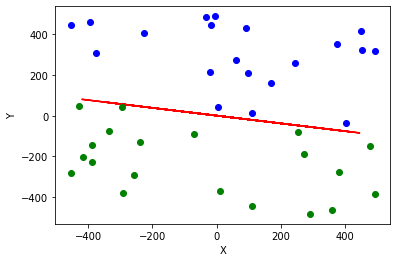

In [19]:
X,y = generate_dataset(20,20)

## Problem 2.2 (35 points)

If $\mathcal{Y}$ is the variable you are trying to predict using a feature $\mathcal{X}$ then in a typical Machine Learning problem, you are tasked with a target function $f$ which maps $\mathcal{X}$ to $\mathcal{Y}$ i.e. Find $f$ such that  $\mathcal{Y}$  = $f(\mathcal{X})$


When you are given a dataset for which you do not have access the target function $f$, you have to learn it from the data. In this problem, we are going to learn the parameters of the line that separates the two classes for the dataset that we constructed in Problem 2.1. As we previously mentioned, that line can be represented as $ax + by + c = 0$.

The goal here is to correctly find out the coefficients $a$, $b$, and $c$, represented below as $\bf{w}$ which is a vector. The algorithm to find it is a simple iterative process: 

1. Randomly choose a $\mathbf{w}$ to begin with.
2. Keep on adjusting the value of $\bf{w}$ as follows until all data samples are correctly classified:
    1. Randomly choose a sample from the dataset without replacement and see if it is correctly classified. If yes,  move on to another sample.
    2. If not,  then  update the weights as $\mathbf{w}^{t+1} = \mathbf{w}^t + y \cdot \mathbf{x}$
    and go back to the previous step (of randomly chosing a sample)
    
        - $\mathbf{w}^{t+1}$ is value of $\mathbf{w}$ at iteration $t+1$
        - $\mathbf{w}^{t}$ is value of $\mathbf{w}$ at iteration $t$
        - $y$ is the class label for the sample under consideration
        - $\mathbf{x}$ is the data-point under consideration
    
    
Write a function that implements this learning algorithm. The input to the function is going to be a dataset represented by the input variable $X$ and the target variable $y$. The output of the function should be the chosen $\mathbf{w}$.



In [16]:
def fit_line(X, y):
    
    for i in range(len(X)):
        if (y[i]== -1):
            plt.plot(X[i][0],X[i][1],'bo')
        else:
            plt.plot(X[i][0],X[i][1],'go')
    
    a = np.random.randint(-500,100)
    b = np.random.randint(0,1000)
    c = np.random.randint(1,500)
    
    rx = np.random.randint(-500,500,size=30)
    ry = -(a/b)*rx - (c/b)
    
    y_p = []
    # end when all points are correctly classified
    while y != y_p:
        y_p = []
        for i in range(len(X)):
            res = a*X[i][0] + b*X[i][1] + c
            if (res < 0):
                y_p.append(-1)
            else :
                y_p.append(1)

            if y[i] != y_p[i]:
                a = a + y[i]*X[i][0]
                b = b + y[i]*X[i][1]
                ry = -(a/b)*rx - (c/b)
        plt.plot(rx,ry,'r-')
        plt.xlabel('X')
        plt.ylabel('Y')
    

    """Predict using the binary classification model. Use the dataset generated 
    using generate_data() as input for this function.
    
    Parameters
    ----------
    X : array_like, shape (n_samples, n_features)
        Samples.
    y : array_like, shape (n_labels, 1)
    
    Returns
    -------
    w : array, shape (1,n_features)
        Returns the final weight vector w.  
    """
    

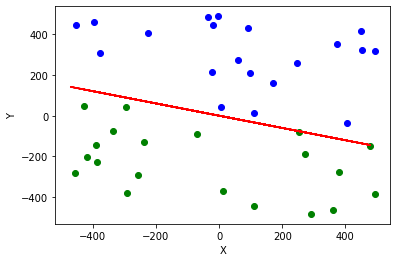

In [20]:
fit_line(X,y)

### Problem 2.3 (10 points)
- Give an intuition of why the above algorithm converges for linearly separable data? We do not expect you to give a mathematic proof, but it would be great if you can provide one. You will get full points even if you just provide an intuition of a few lines. Including figures or mathematical equations is encouraged but not required. (5 points)

  - Answer: Linearly separable data is when we can classify the data points in a 2 dimensional XY plane by a simple line between the the 2 classes. Binary classification is possible for the model above because the data is linearly separable. If the data is not linearly separable, a simple line equation in the form ax + by + c = 0 cannot be plotted to classify data that is not linearly separable. For example, data which lies in concentric circles which can only be classified by another circle between the 2 classes. The equation ax + by + c = 0, only accounts for a simple line and  can only take a linear form with different values of X and Y. Hence a straight line can only classify our data points into 2 parts.   

- What happens when the data is not linearly separable? What can be done to salvage the situation?

  - Answer: If the data is not linearly separable, this model cannot classify it into either of the class labels correctly as the classification is done by a straight line in our model. If the data is not linearly separable, in order to salvage the situation, we can remove the restriction of the classifying the data by a straight line and classify it by using non linear classification techniques like KNN. Depending on the distribution of the data, the suitable method for classification can be chosen. 